In [1]:
from source.util import utils as u
from source import metrics, plots
from source import scargc, hs
import sys
import time
import os
import psutil
import resource
import numpy as np
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score

In [2]:
poolsize = 300
clusters = 2
n_components = 2
epsilon = 0.05
percent = 10
step = 100
k = 50
with_Pca = 1

In [3]:
base = '/home/test/Documentos/Handshake-TCC/datasets/elec.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base, 1)


In [4]:

start = time.time()
# predicted, updt = scargc.newScargc(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features, k)

predicted, updt, clustering = hs.handshakePCA(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, epsilon, percent, k, with_Pca)
end = time.time()

In [5]:
tempo = end - start

acc_percent, f1_percent, mcc_percent = metrics.makeBatches(l_stream, predicted, len(stream), step)
score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, step, f1_type = 'macro')

Acc:  0.603193339227822
Macro-F1:  0.6030272682302447
MCC:  0.2488286005586496
Desvio Padrão:  0.09723614220315628
Numero de atualizações:  17602


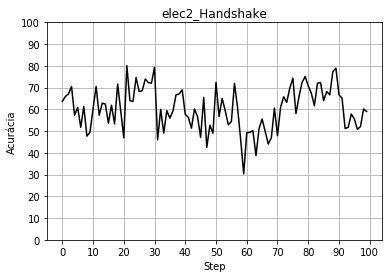

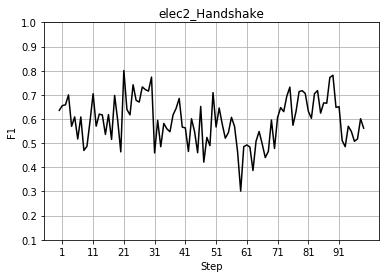

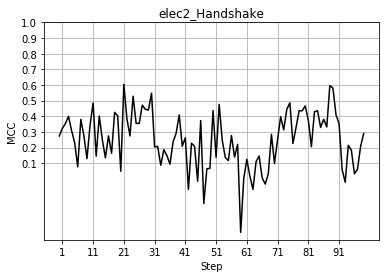

In [6]:
# print('memory peak: ', mem)
print('Acc: ', score)
print('Macro-F1: ', f1)
print('MCC: ', mcc)
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', updt)
plots.plotAcc(acc_percent, step, 'elec2_Handshake')
plots.plotF1(f1_percent, step, 'elec2_Handshake')
plots.plotMCC(mcc_percent, step, 'elec2_Handshake')

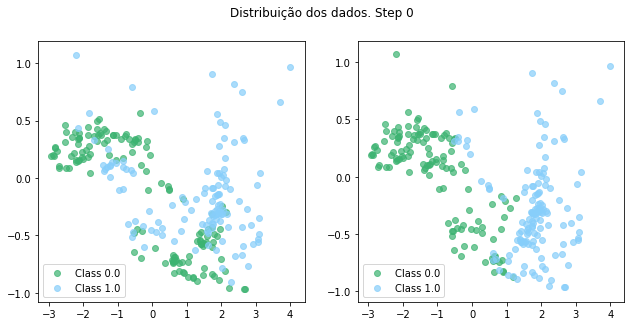

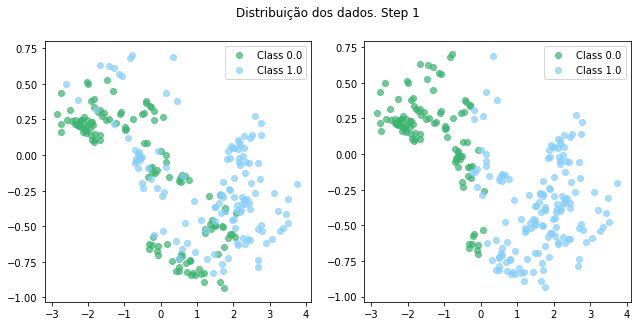

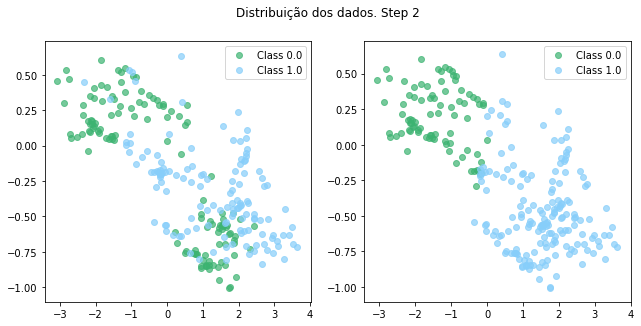

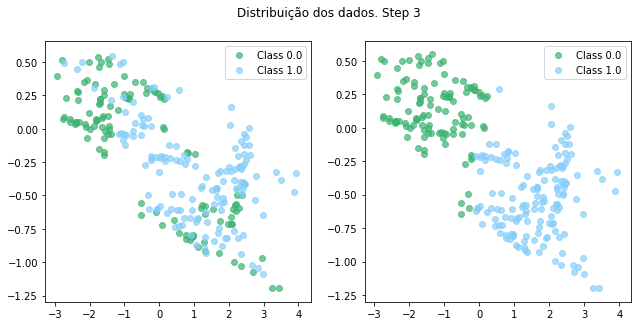

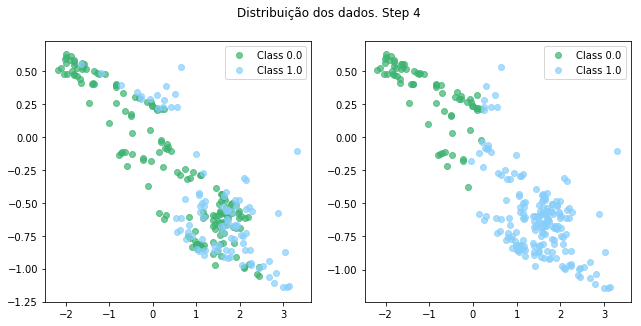

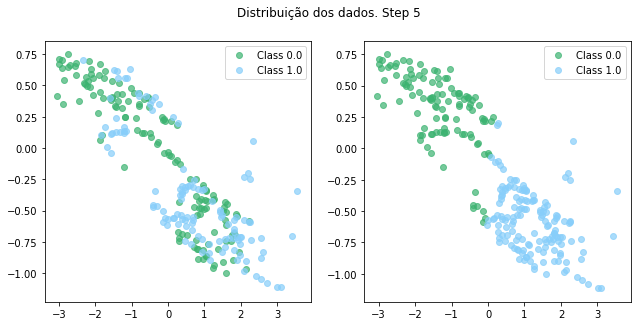

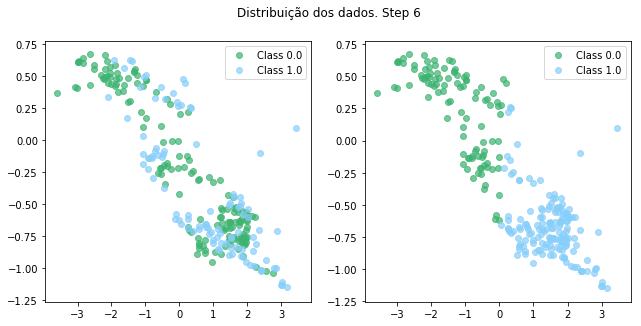

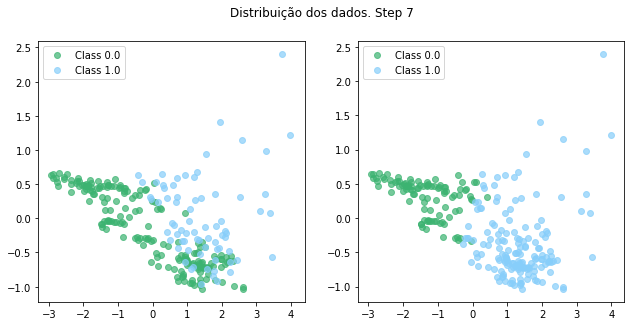

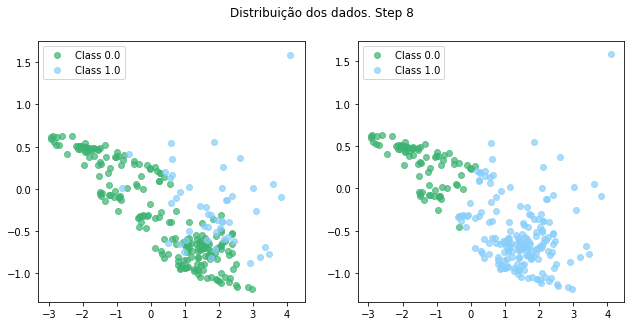

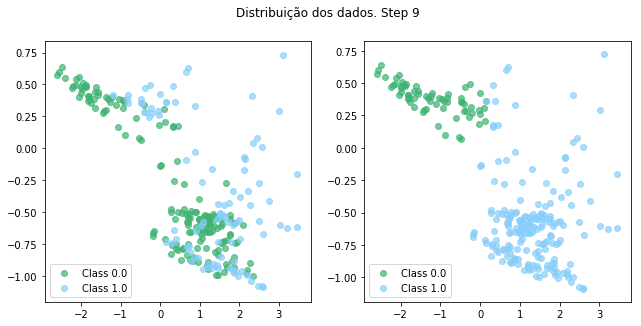

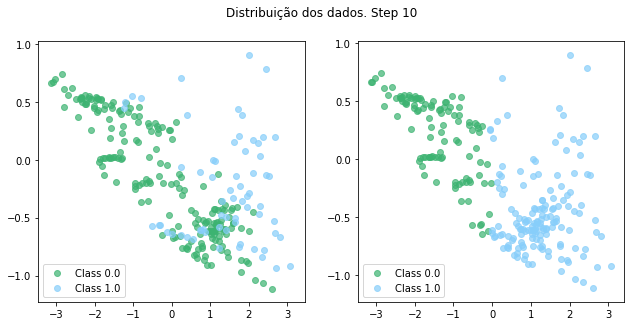

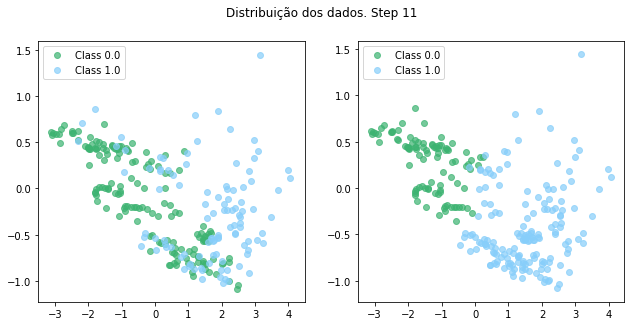

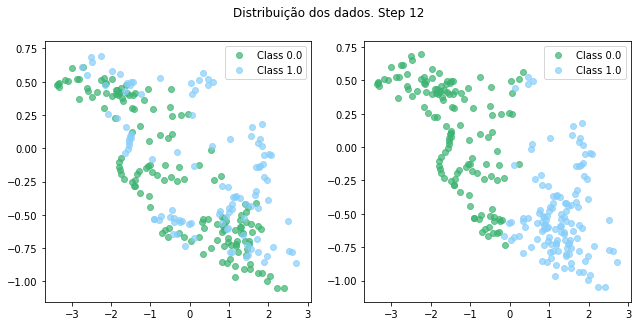

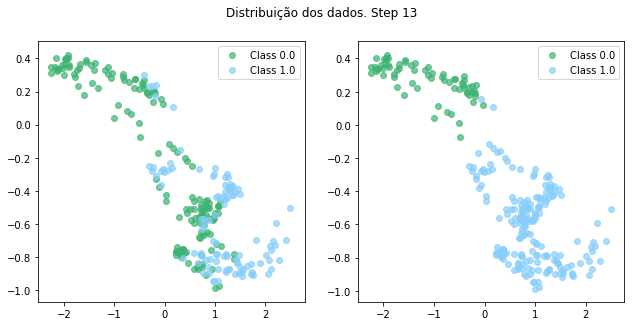

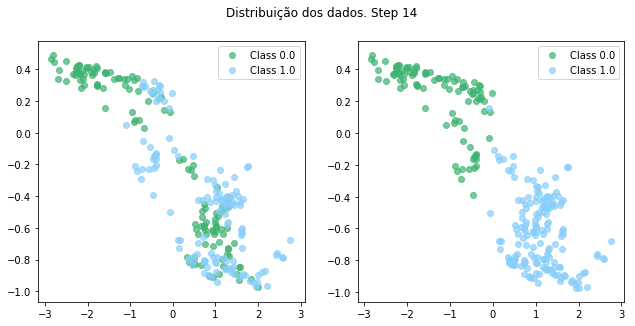

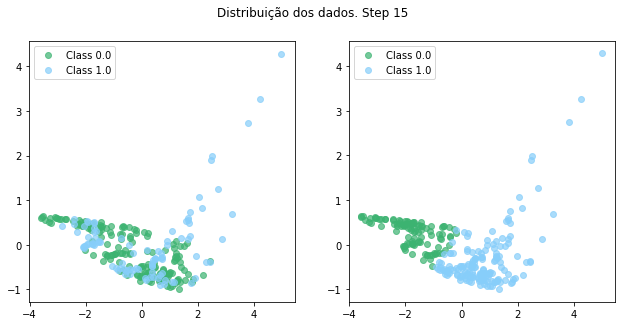

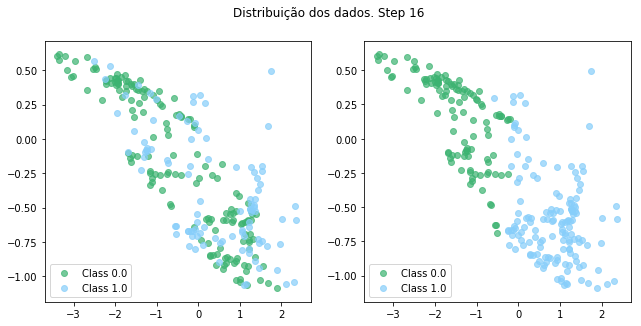

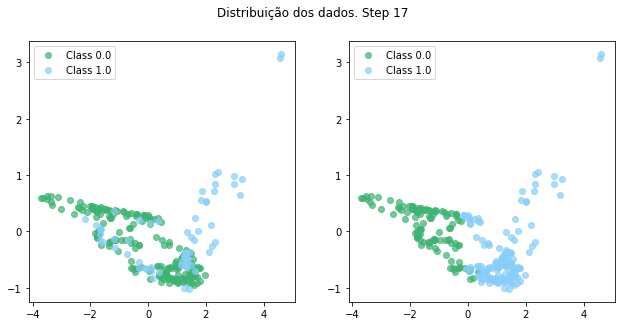

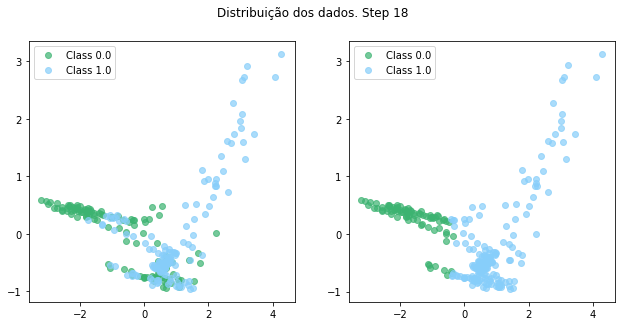

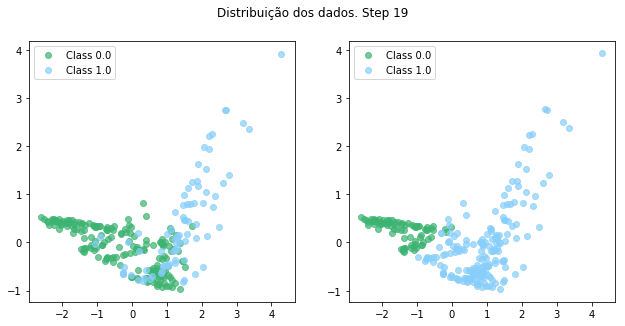

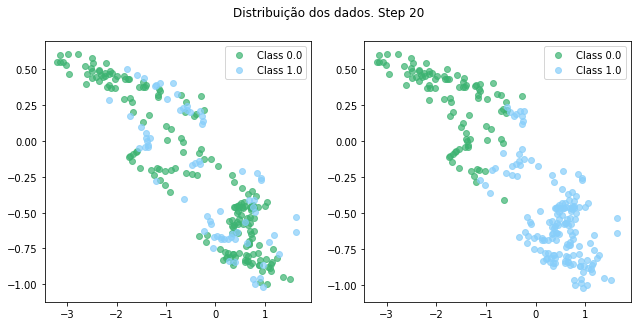

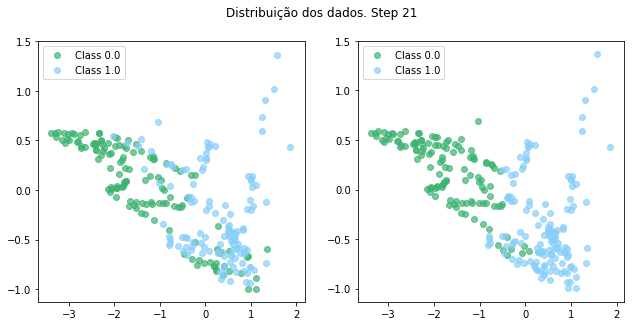

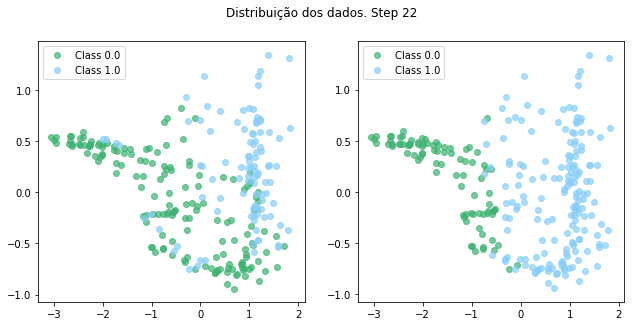

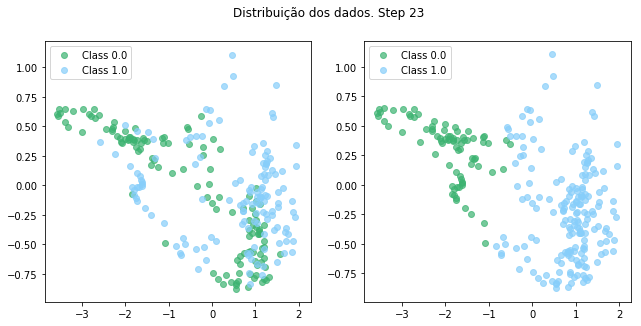

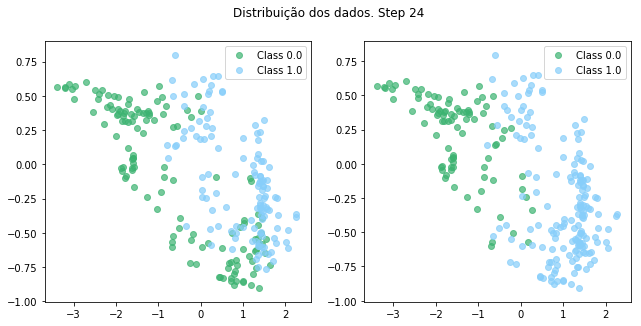

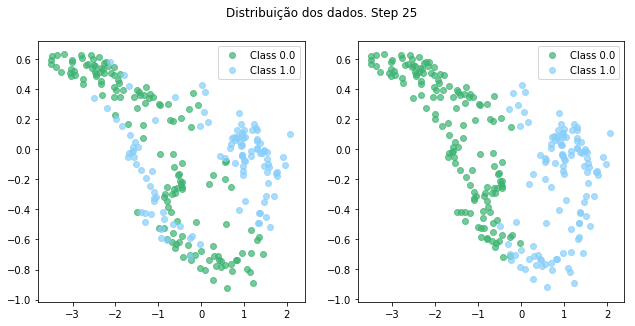

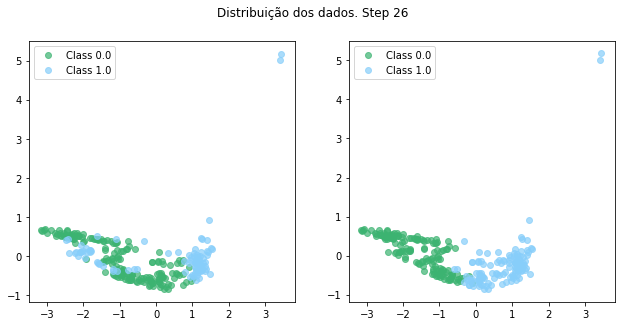

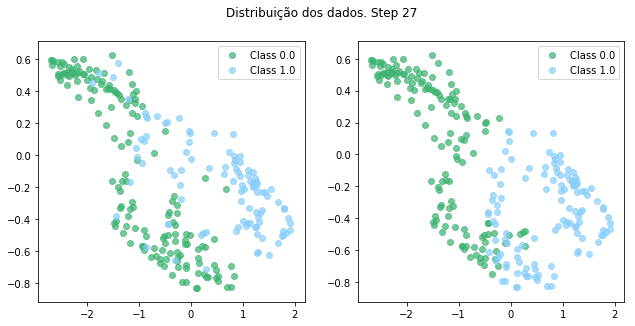

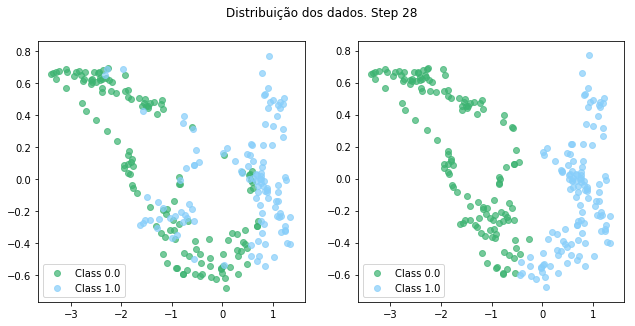

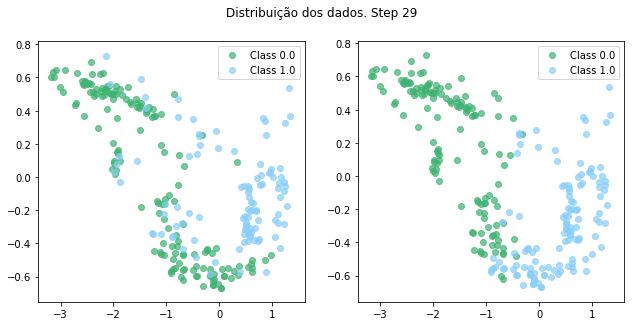

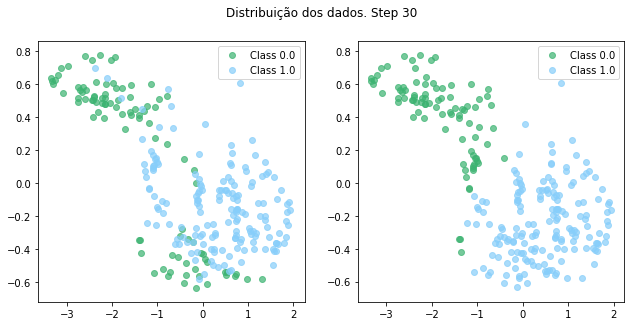

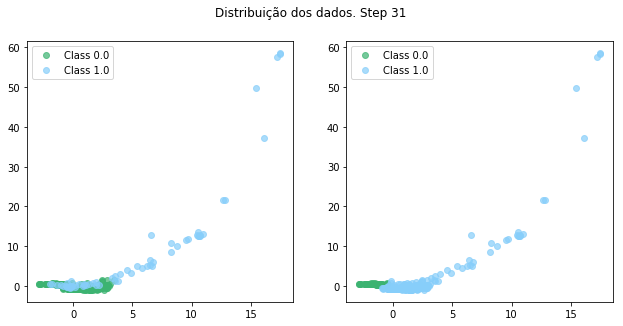

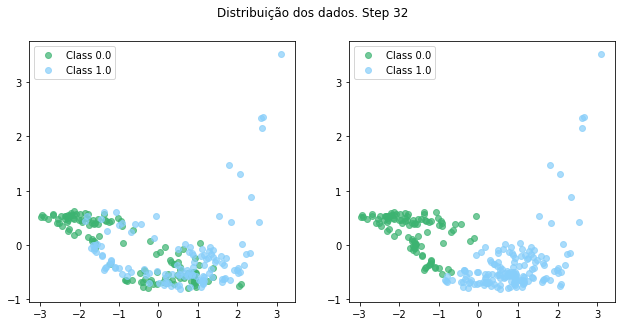

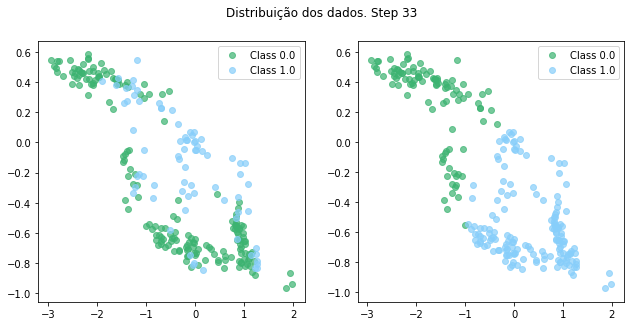

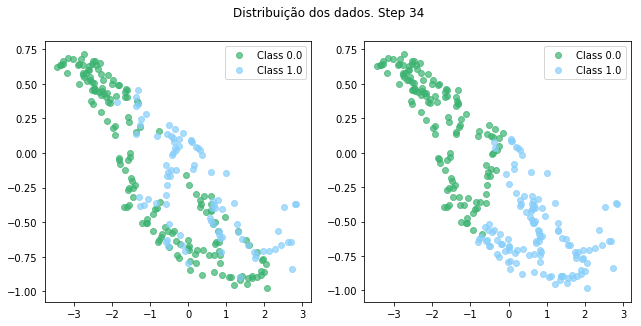

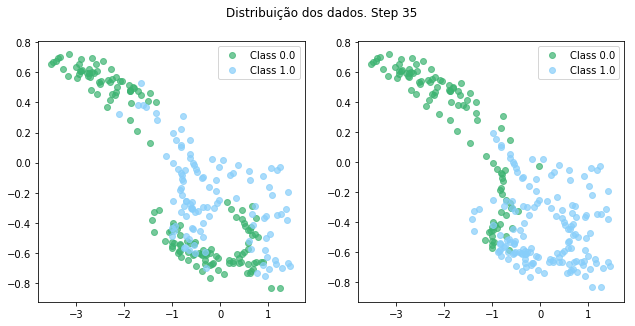

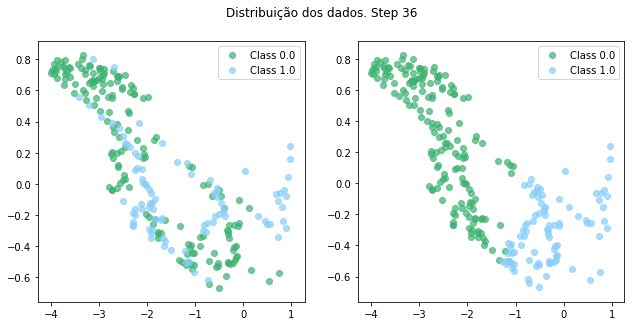

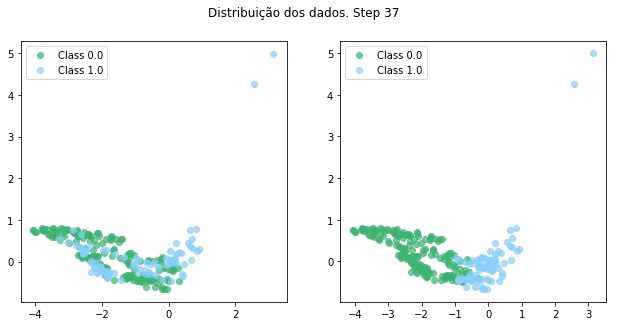

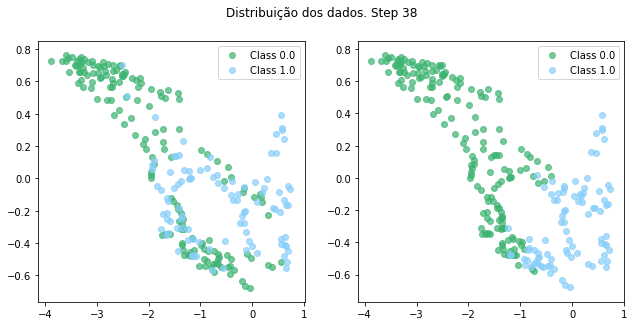

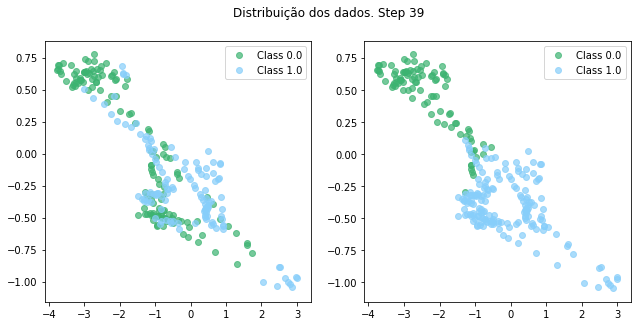

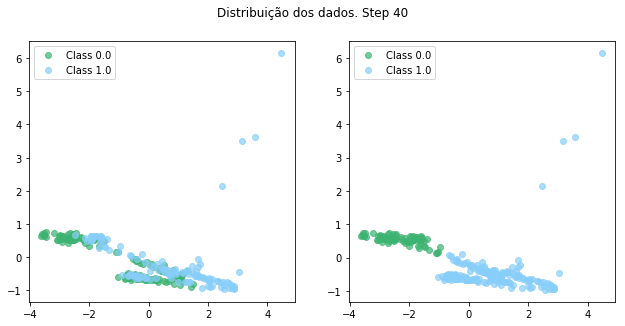

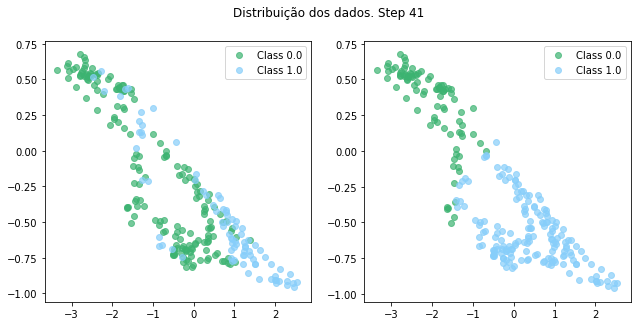

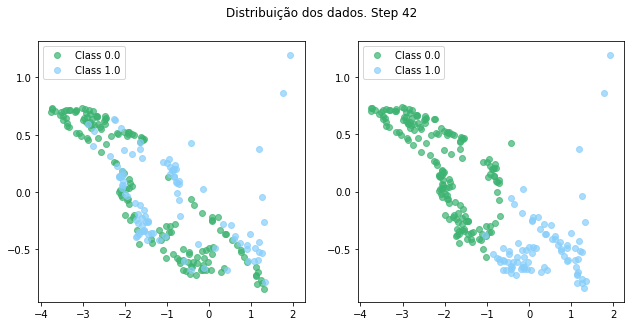

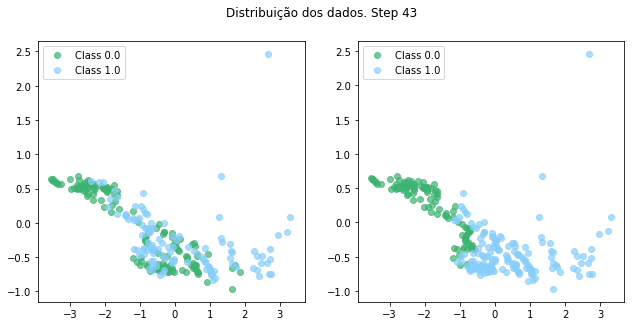

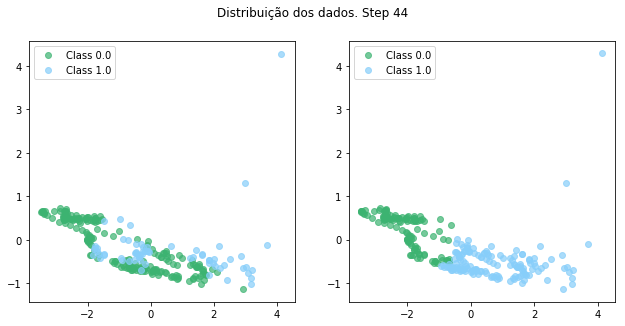

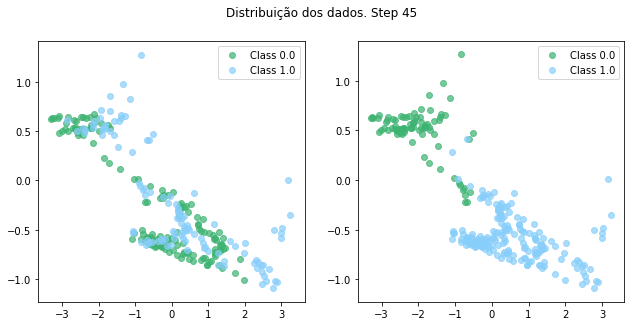

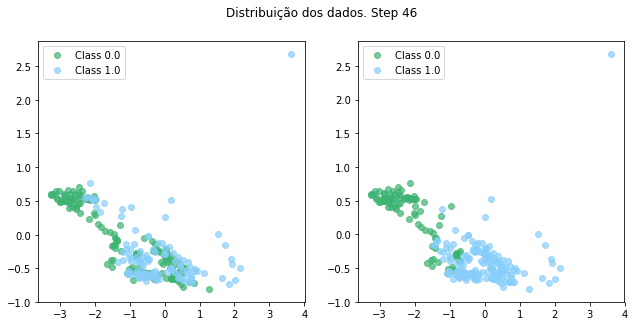

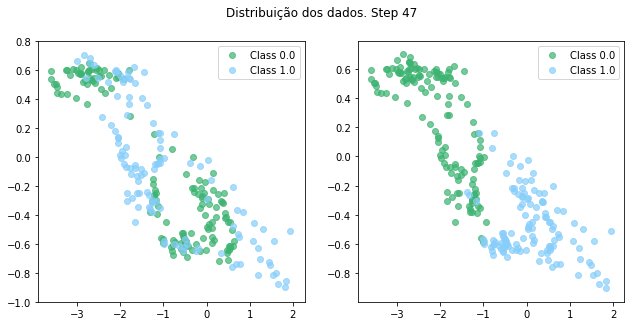

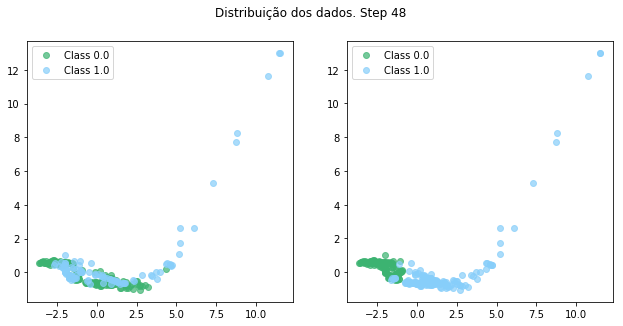

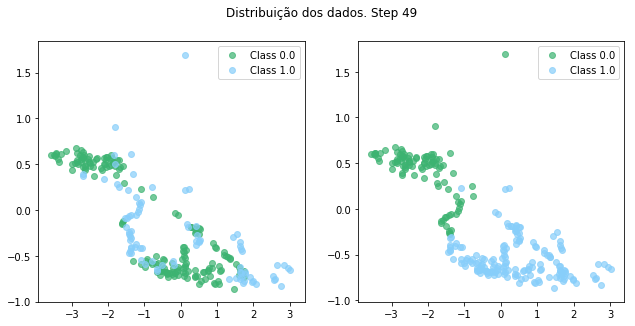

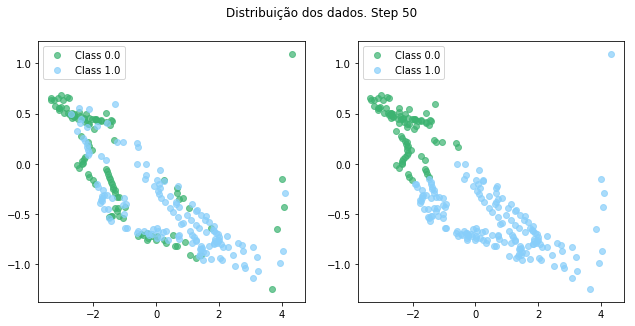

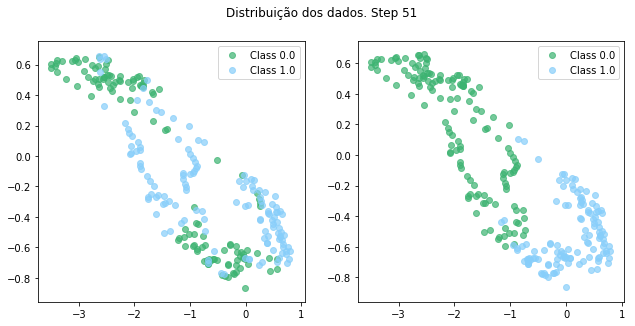

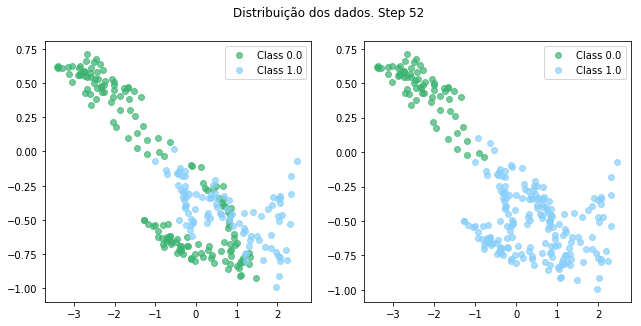

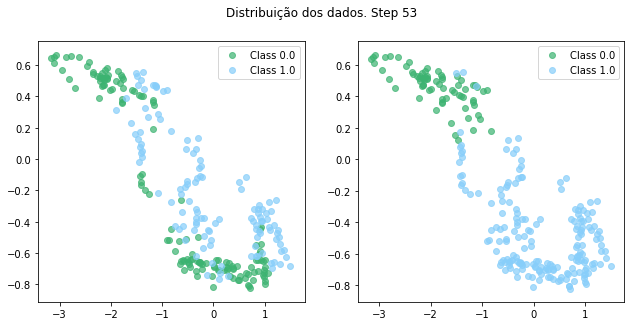

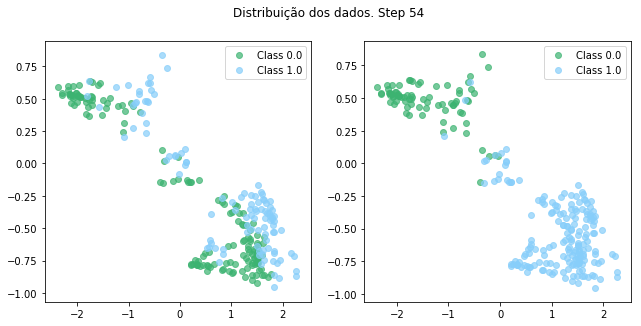

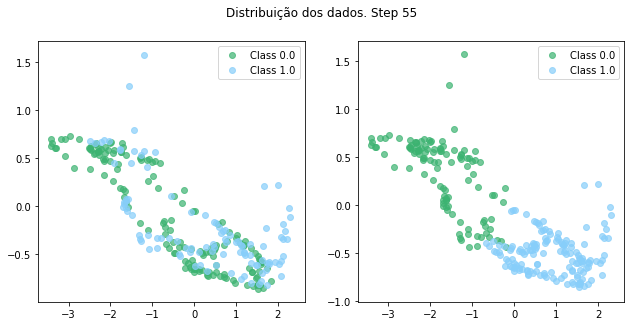

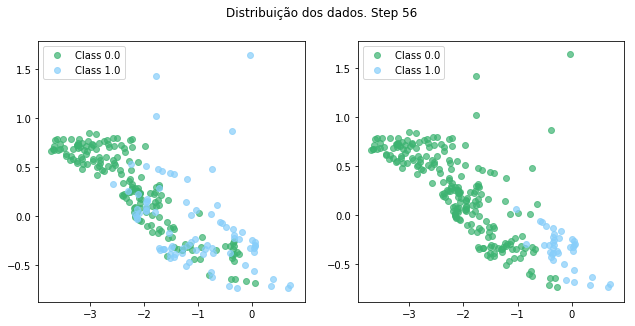

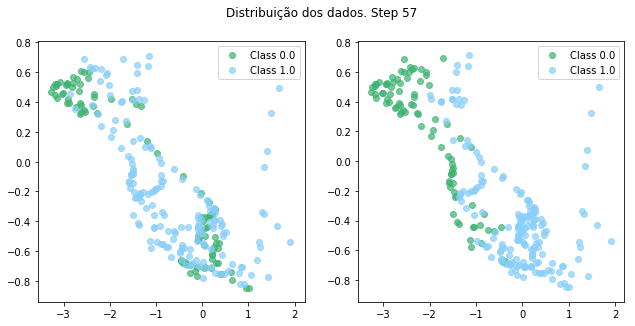

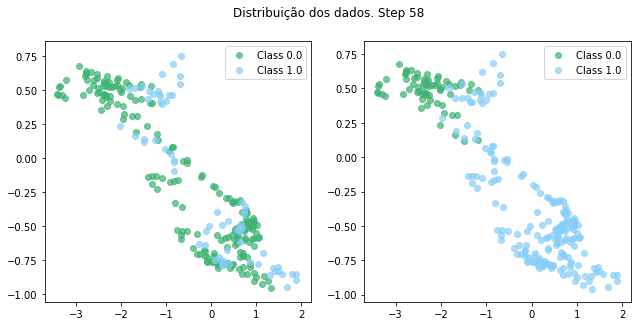

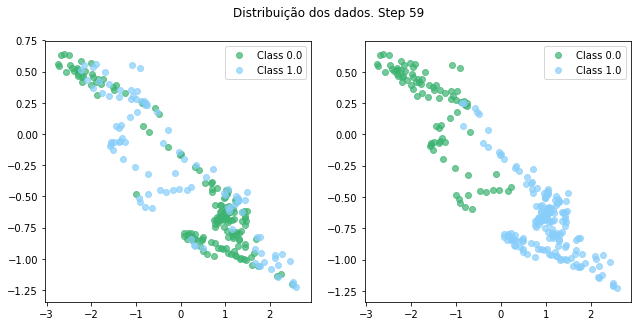

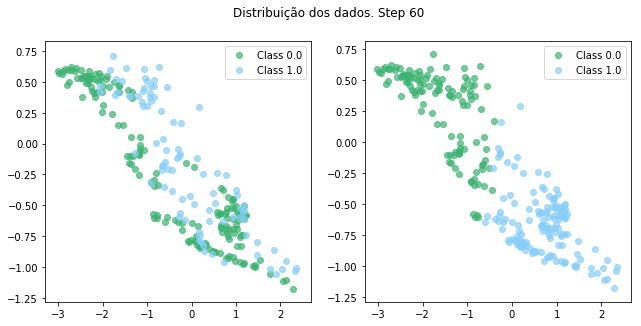

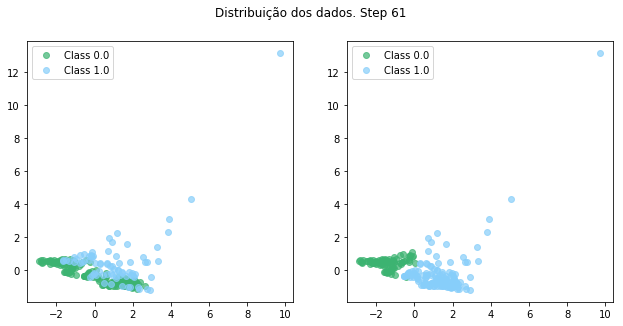

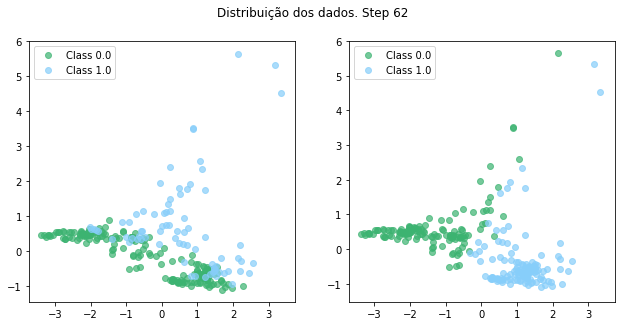

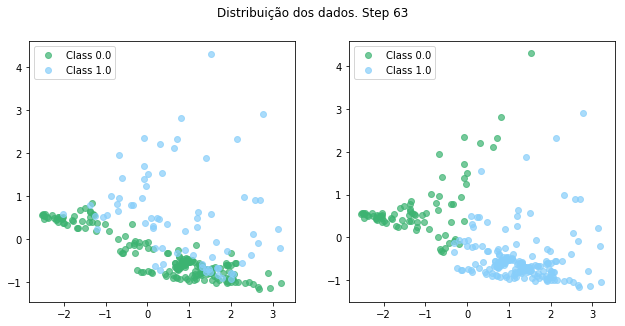

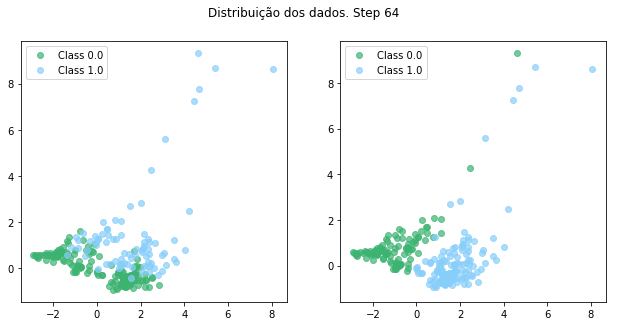

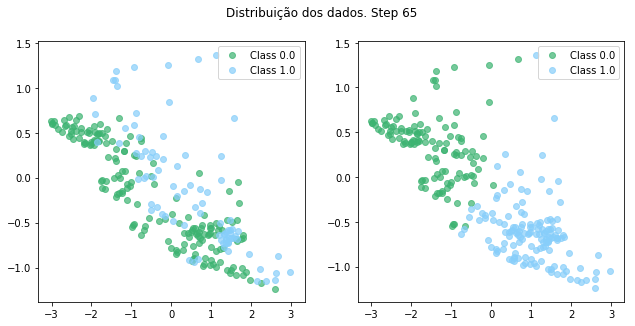

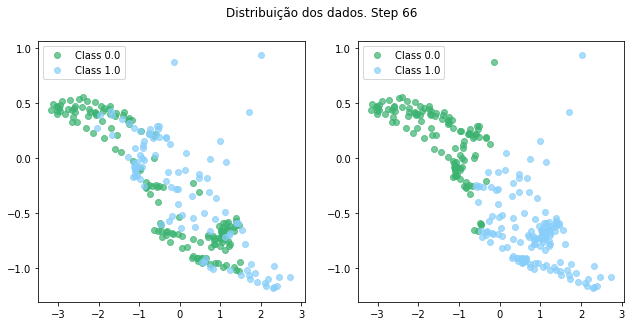

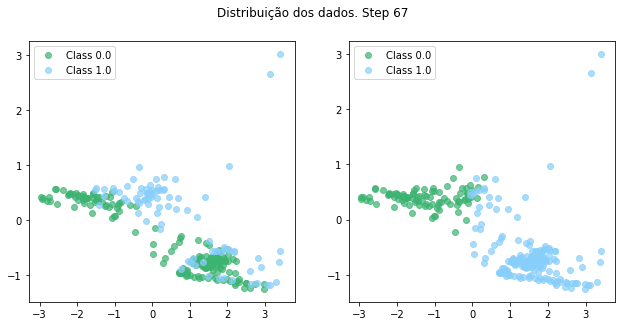

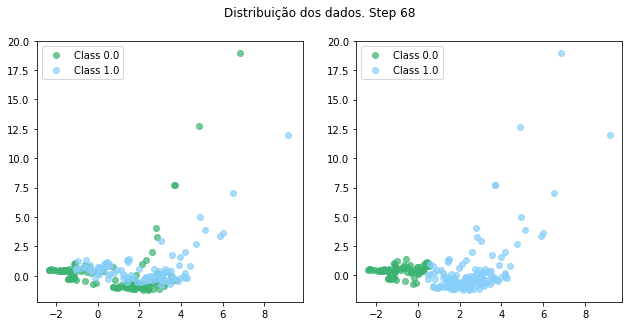

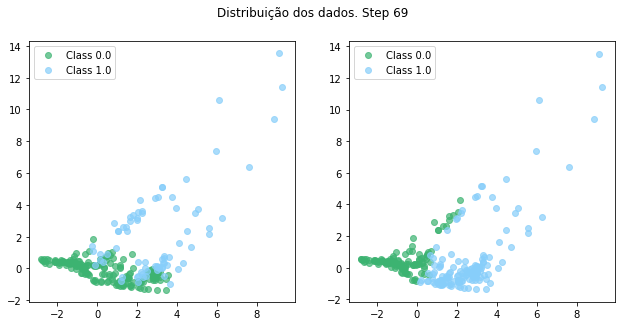

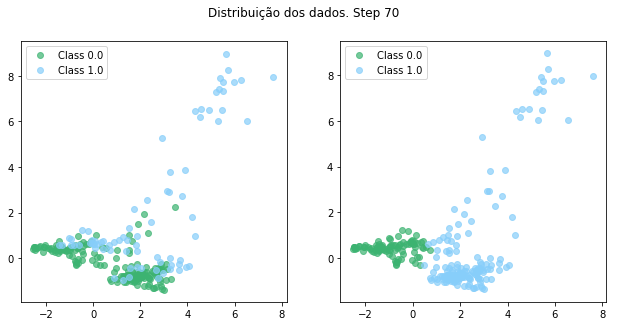

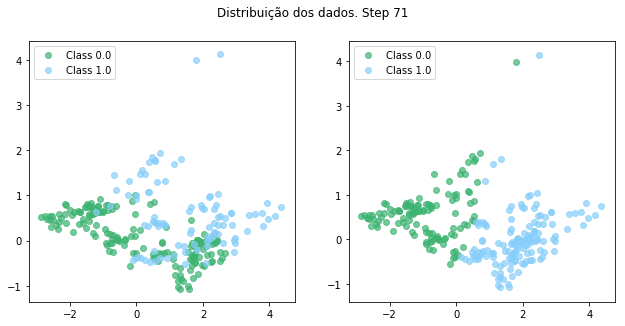

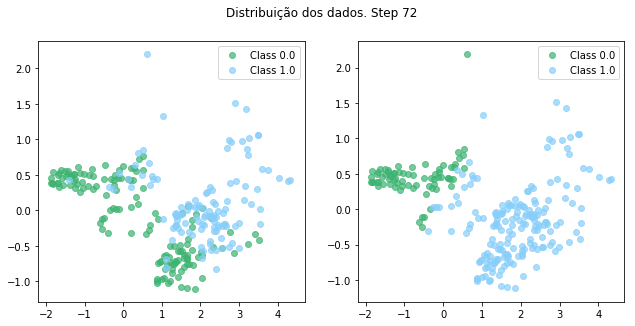

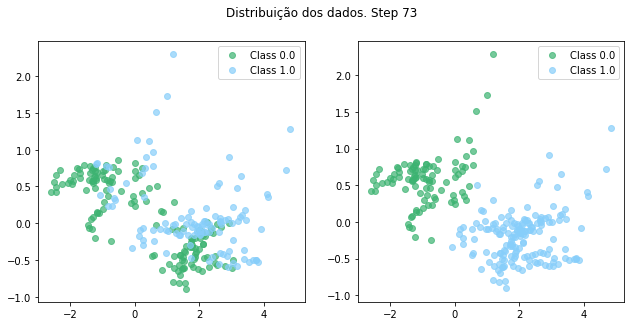

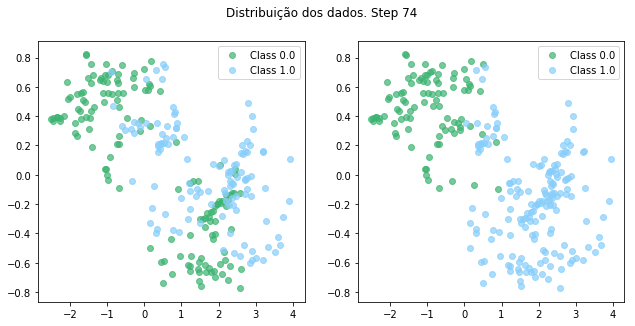

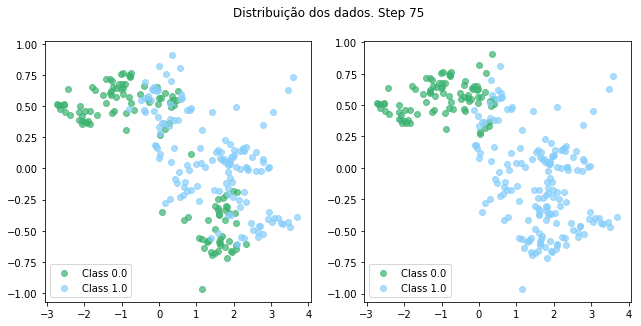

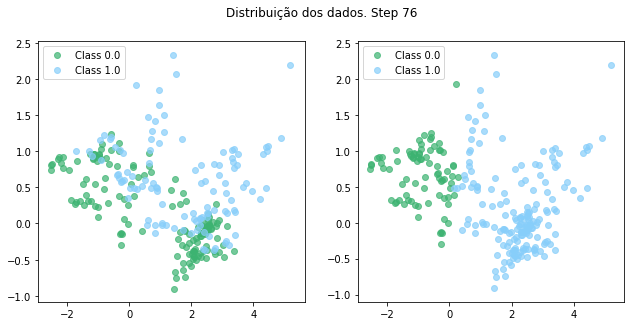

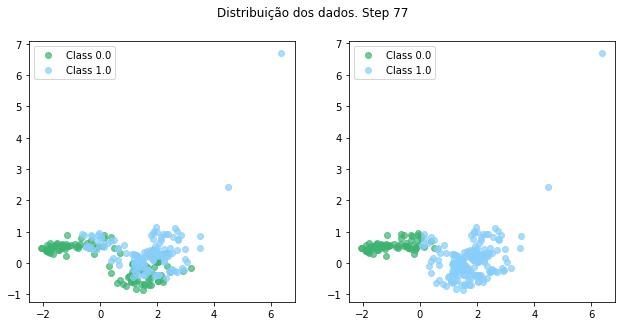

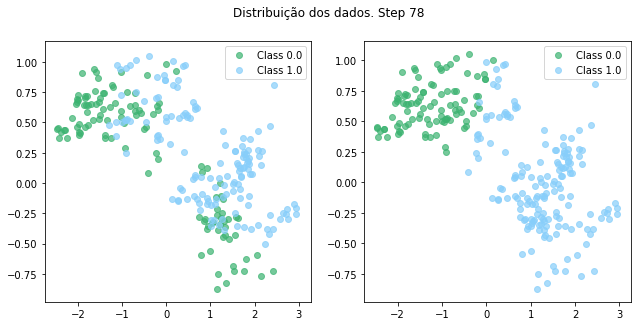

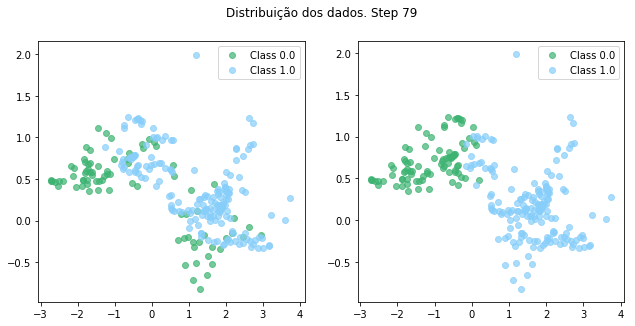

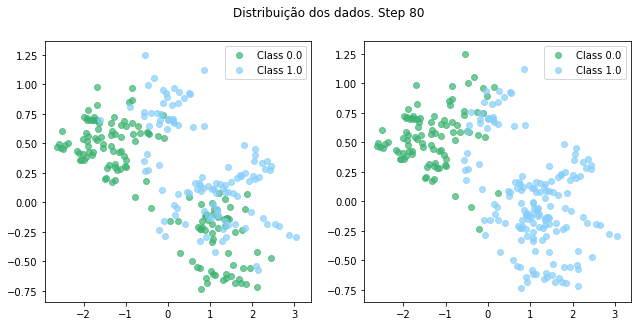

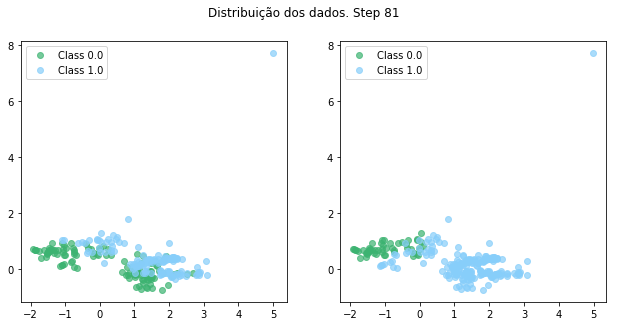

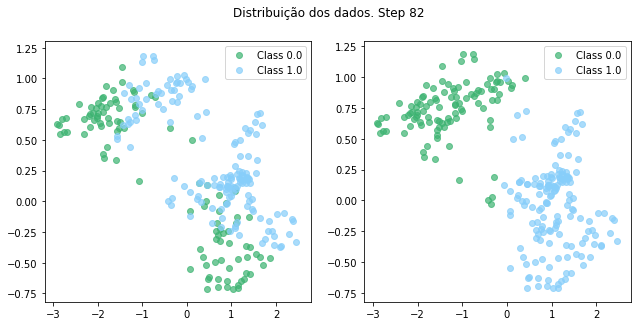

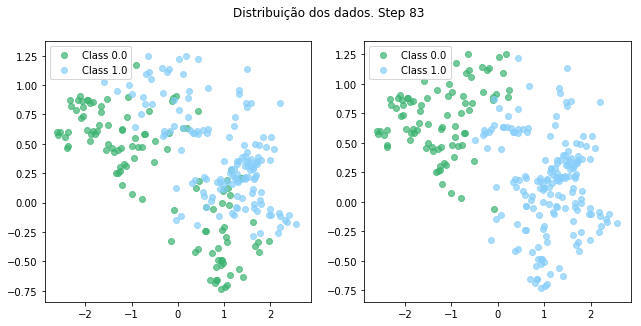

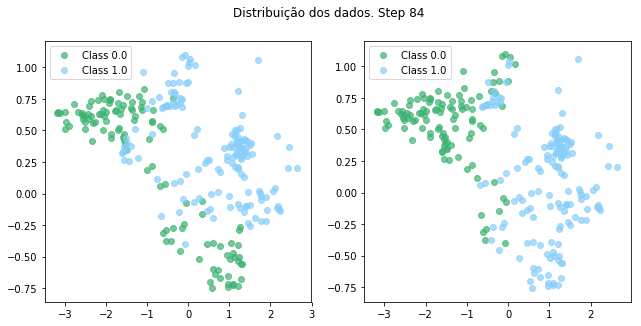

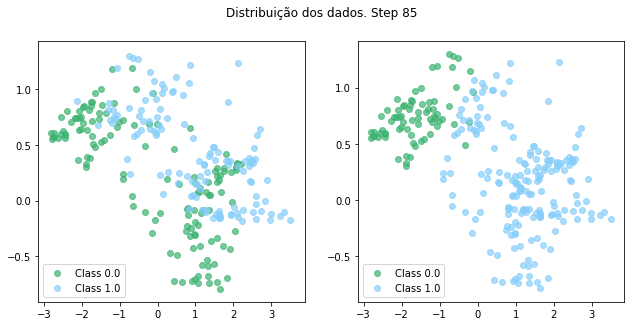

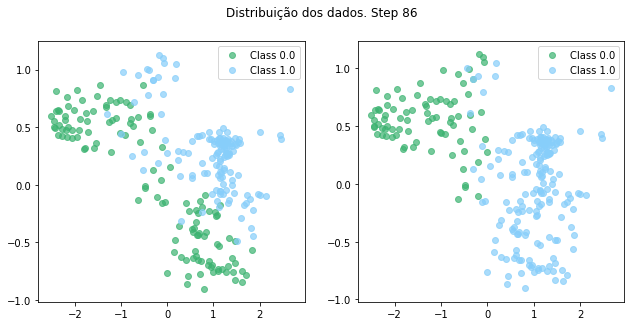

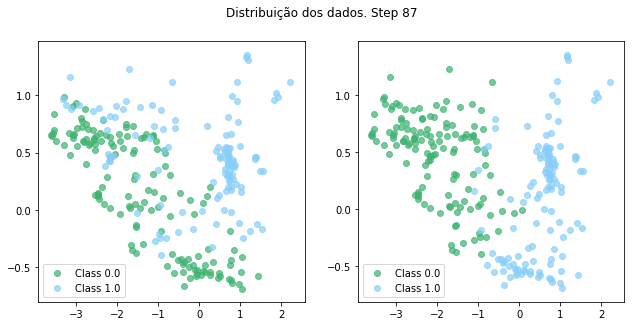

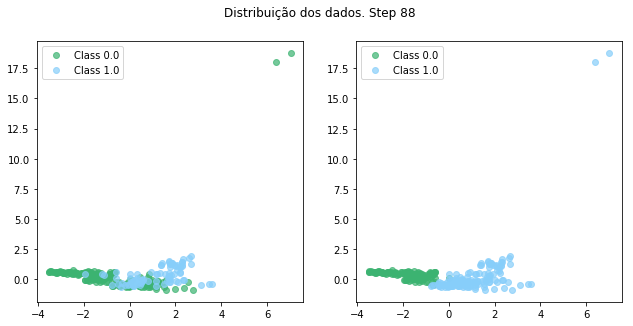

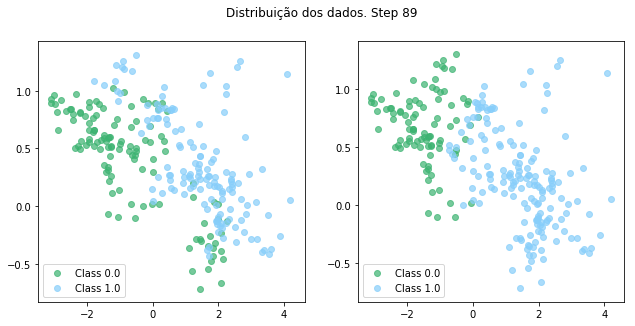

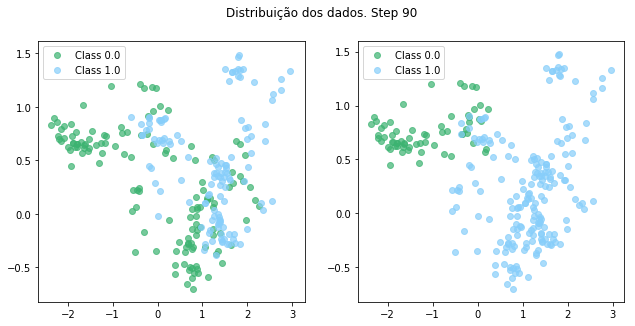

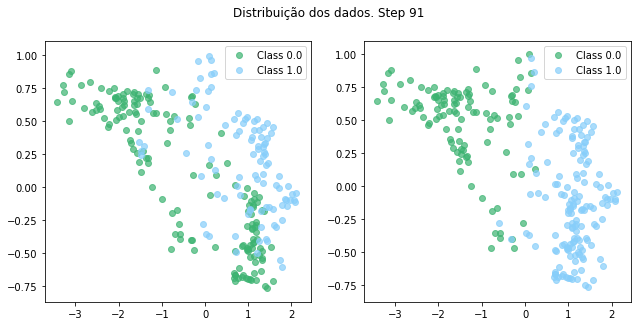

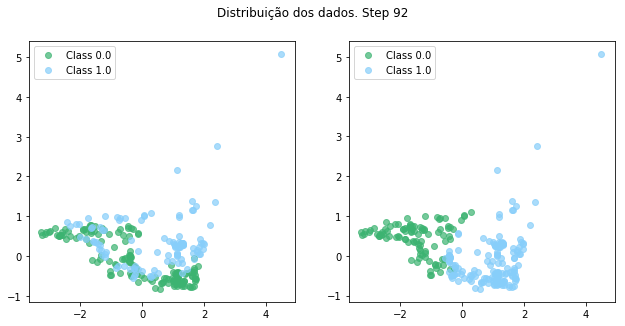

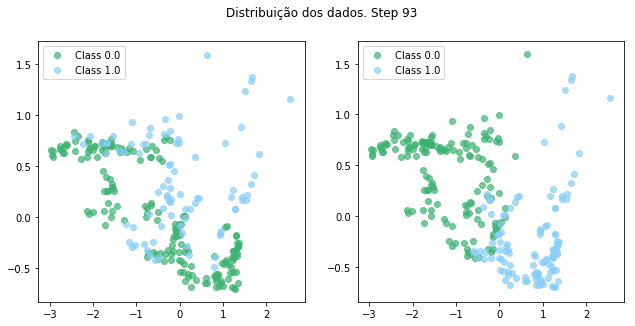

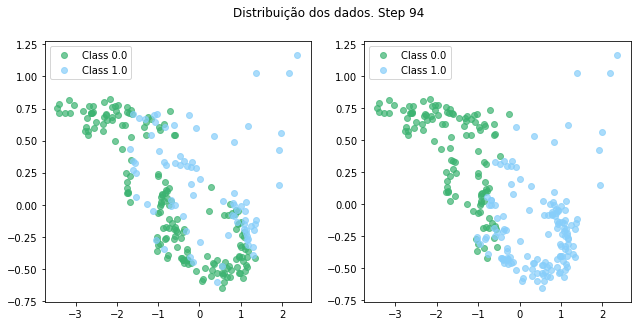

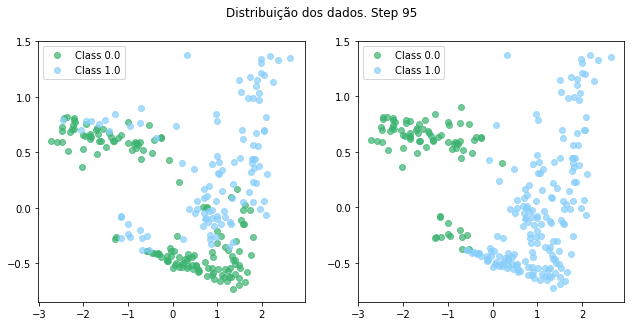

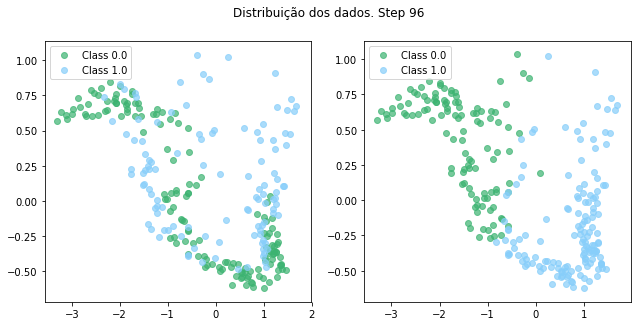

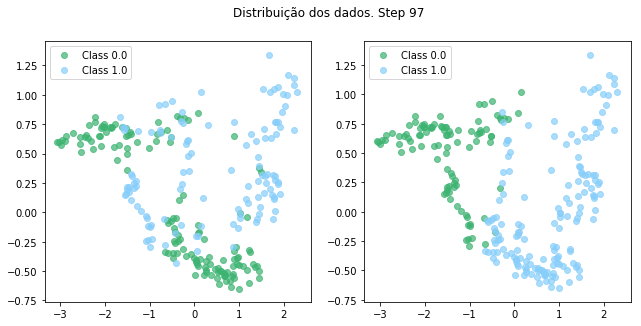

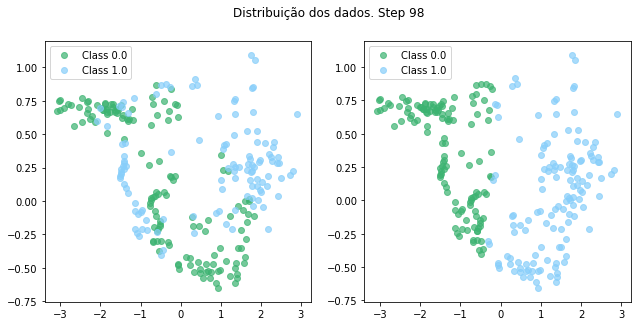

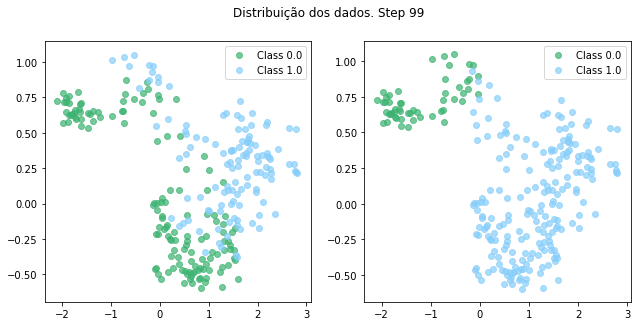

In [7]:
plots.plotPerBatches(stream, predicted, l_stream, len(stream), step)

In [8]:
print(tempo)

748.2641310691833
